<h1 style="color:green;text-align:center">Sentiment Analysis Task</h1>

<h1 style="color:red">Data preprosessing</h1>

In [2]:
import numpy as np
from nltk.corpus import stopwords
from string import punctuation
from sklearn.decomposition import PCA
from keras.preprocessing.sequence import pad_sequences

/home/mohamed/anaconda3/envs/NLTK/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
with open("TrainData.txt", "r") as f:
    train_reviews = f.read()  
    
with open("TrainDataLabel.txt", "r") as f:
    train_labels = f.read()
    
with open("TestData.txt") as f:
    test_reviews = f.read()
    
with open("TestDataLabel.txt") as f:
    test_labels = f.read()    

### delete punctuations from the corpus

In [5]:
train_words = '' .join([c for c in train_reviews if c not in punctuation])
train_reviews = train_words.split("\n")
train_labels = train_labels.splitlines()

# max length of features
max_len = 40

In [6]:
test_words = '' .join([c for c in test_reviews if c not in punctuation])
test_reviews = test_words.split("\n")
test_labels = test_labels.splitlines()

** number of reviews and labels **

In [7]:
print(len(train_reviews))
print(len(train_labels))

4971
4970


In [8]:
print(len(test_reviews))
print(len(test_labels))

2311
2310


In [9]:
unique_labels = set(train_labels)
print(unique_labels)

{'joy', 'sadness', 'disgust', 'anger', 'fear', 'shame', 'guilt'}


In [10]:
labels_dict = {label : i for i, label in enumerate(unique_labels)}

In [11]:
print(labels_dict)

{'joy': 0, 'sadness': 1, 'disgust': 2, 'anger': 3, 'fear': 4, 'shame': 5, 'guilt': 6}


In [12]:
# prepare train labels
b_train_labels = [labels_dict[label] for label in train_labels]
# prepare test labels
b_test_labels = [labels_dict[label] for label in test_labels]

In [13]:
# insert another label 
b_train_labels.append(0)
b_test_labels.append(0)

In [14]:
print(len(b_train_labels))
print(len(b_test_labels))

4971
2311


### convert labels to one hot vectors

In [15]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(b_train_labels, 7)
y_test = to_categorical(b_test_labels, 7)

-------------

<h1 style="color:red">Feature Extraction</h1>

In [16]:
train_sentences = [[word for word in review.split()[:max_len]] for review in train_reviews]
test_sentences = [[word for word in review.split()[:max_len]] for review in test_reviews]

In [17]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# train tokenizer
train_tk = Tokenizer()
train_tk.fit_on_texts(train_sentences)
train_matrix = train_tk.texts_to_matrix(train_sentences)

# test tokenizer
test_tk = Tokenizer()
test_tk.fit_on_texts(test_sentences)
test_matrix = test_tk.texts_to_matrix(test_sentences)

In [18]:
# pad train sequence
train_data = pad_sequences(train_matrix, maxlen=max_len, padding="pre", truncating="post")
# pad test sequence
test_data = pad_sequences(test_matrix, maxlen=max_len, padding="pre", truncating="post")

In [19]:
print(train_data)

[[0 1 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


------------------

# <font color="red">LSTM </font>

In [149]:
vocab_size = len(train_tk.word_index)
embedding_dim = 100
lstm_size = 256

In [150]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding
from keras.layers.recurrent import LSTM

# keras model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(units=lstm_size, return_sequences=True))
model.add(LSTM(units=lstm_size, return_sequences=False))
model.add(Dense(7,activation='softmax'))

In [151]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 100)         785300    
_________________________________________________________________
lstm_13 (LSTM)               (None, None, 256)         365568    
_________________________________________________________________
lstm_14 (LSTM)               (None, 256)               525312    
_________________________________________________________________
dense_29 (Dense)             (None, 7)                 1799      
Total params: 1,677,979
Trainable params: 1,677,979
Non-trainable params: 0
_________________________________________________________________
None


In [169]:
train = model.fit(train_data, y_train, validation_split=0.1, epochs=70, batch_size=32, shuffle=True, verbose=1)

Train on 4473 samples, validate on 498 samples
Epoch 1/70
4473/4473 [==============================] - 41s 9ms/step - loss: 1.9027 - acc: 0.1625 - val_loss: 3.2192 - val_acc: 0.0000e+00
Epoch 2/70
4473/4473 [==============================] - 42s 9ms/step - loss: 1.8999 - acc: 0.1688 - val_loss: 2.9899 - val_acc: 0.0000e+00
Epoch 3/70
4473/4473 [==============================] - 40s 9ms/step - loss: 1.8964 - acc: 0.1784 - val_loss: 2.7272 - val_acc: 0.0000e+00
Epoch 4/70
4473/4473 [==============================] - 42s 9ms/step - loss: 1.8938 - acc: 0.1820 - val_loss: 2.8814 - val_acc: 0.0000e+00
Epoch 5/70
4473/4473 [==============================] - 54s 12ms/step - loss: 1.8929 - acc: 0.1768 - val_loss: 2.7686 - val_acc: 0.0000e+00
Epoch 6/70
4473/4473 [==============================] - 46s 10ms/step - loss: 1.8901 - acc: 0.1835 - val_loss: 2.9505 - val_acc: 0.0000e+00
Epoch 7/70
4473/4473 [==============================] - 46s 10ms/step - loss: 1.8883 - acc: 0.1876 - val_loss: 3.1598

Epoch 60/70
4473/4473 [==============================] - 50s 11ms/step - loss: 0.4959 - acc: 0.8267 - val_loss: 5.4148 - val_acc: 0.0743
Epoch 61/70
4473/4473 [==============================] - 51s 11ms/step - loss: 0.5005 - acc: 0.8245 - val_loss: 5.7489 - val_acc: 0.0502
Epoch 62/70
4473/4473 [==============================] - 48s 11ms/step - loss: 0.4690 - acc: 0.8388 - val_loss: 5.7675 - val_acc: 0.0663
Epoch 63/70
4473/4473 [==============================] - 51s 11ms/step - loss: 0.4308 - acc: 0.8493 - val_loss: 5.9541 - val_acc: 0.0502
Epoch 64/70
4473/4473 [==============================] - 48s 11ms/step - loss: 0.3941 - acc: 0.8607 - val_loss: 6.0513 - val_acc: 0.0542
Epoch 65/70
4473/4473 [==============================] - 49s 11ms/step - loss: 0.3896 - acc: 0.8659 - val_loss: 5.9442 - val_acc: 0.0562
Epoch 66/70
4473/4473 [==============================] - 50s 11ms/step - loss: 0.4035 - acc: 0.8585 - val_loss: 6.0835 - val_acc: 0.0522
Epoch 67/70
4473/4473 [==================

### Visualize the training and validation loss

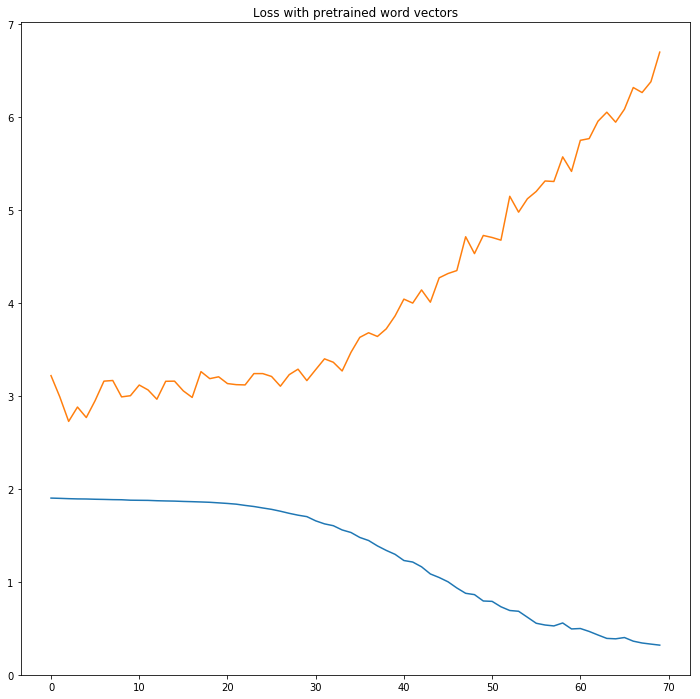

In [170]:
import pandas as pd
from matplotlib import pyplot as plt

history = pd.DataFrame(train.history)
plt.figure(figsize=(12,12));
plt.plot(history["loss"]);
plt.plot(history["val_loss"]);
plt.title("Loss with pretrained word vectors");
plt.show();

### Test your algorithm

In [171]:
# prediction
predictions = model.predict(test_data)
#print('First prediction:', b_test_labels[np.argmax(predictions, axis=1)])
for row in predictions:
    print(b_test_labels[np.argmax(row)])

In [172]:
score = model.evaluate(test_data, y_test, verbose = 1, batch_size = 32)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2311/2311 [==============================] - 6s 3ms/step
Test loss: 4.835760002268284
Test accuracy: 0.1479878840328862
